# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from thermolib.thermodynamics.fep import FreeEnergySurface2D, plot_feps
from thermolib.thermodynamics.histogram import Histogram2D
from thermolib.tools import read_wham_input_2D

import numpy as np, matplotlib.pyplot as pp, time

from molmod.units import *

import cProfile

# Example Elias 1

In [ ]:
fn_fes_ext = '/home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/ODealkylation/freefile_no18'
temp = 523*kelvin
fes_ext = FreeEnergySurface2D.from_txt(fn_fes_ext, temp, delimiter='\t', verbose=True)
fes_ext.plot('fes_elias1_ext.png', ncolors=10, lims=[0,100])

In [ ]:
#read temperature and bias potentials from wham_input.txt file
fn_wham = '/home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/ODealkylation/metadatafile_no18'
temp_none, biasses, trajectories = read_wham_input_2D(fn_wham, path_template_colvar_fns='%s', stride=10, verbose=True)

## Without error estimation

In [ ]:
bins = [np.arange(0.5,1.5+1/240, 1/240),np.arange(0.0,1.0+1/240,1/240)]
hist = Histogram2D.from_wham(bins, trajectories, biasses, temp, error_estimate=None, verbose=True, convergence=1e-6)

In [ ]:
fes = FreeEnergySurface2D.from_histogram(hist, temp)
fes.set_ref(ref='min')
fes.plot('fes_elias1.png', ncolors=10, lims=[0,100])

In [ ]:
fep_ext = fes_ext.project_difference()
fep_ext.set_ref(ref='min')
fep = fes.project_difference()
fep.set_ref(ref='min')
plot_feps('projected_feps.png', [fep_ext,fep], temp=523*kelvin, 
          labels=['External', 'ThermoLIB'], colors=['k','b'],linestyles=['--', '-'])

In [ ]:
fep_ext = fes_ext.project_average()
fep_ext.set_ref(ref='min')
fep = fes.project_average()
fep.set_ref(ref='min')
plot_feps('projected_feps.png', [fep_ext,fep], temp=523*kelvin, 
          labels=['External', 'ThermoLIB'], colors=['k','b'],linestyles=['--', '-'])

## With error estimation

In [ ]:
bins = [np.arange(0.5,1.5+1/240, 1/240),np.arange(0.0,1.0+1/240,1/240)]
hist = Histogram2D.from_wham(bins, trajectories, biasses, temp, error_estimate='None', verbose=True, convergence=1e-6)

In [ ]:
hist_p = Histogram2D.from_wham(bins, trajectories, biasses, temp, pinit=hist.ps, error_estimate='mle_f', verbose=True, convergence=1e-6)

In [ ]:
fes_f = FreeEnergySurface2D.from_histogram(hist_f, temp)
fes_f.set_ref(ref='min')
fes_f.plot('fes_elias1.png', ncolors=10, lims=[0,100])

In [ ]:
fes_err = FreeEnergySurface2D(fes_f.cv1s.copy(), fes_f.cv2s.copy(), fes_f.fupper-fes_f.flower, fes_f.T)
fes_err.plot('fes_elias1_err.png', ncolors=10, lims=[0,20])

# Example Massimo

CV grid specification
---------------------
CV1 grid [au]: start = 1.305e+00    end = 3.995e+00    delta = 1.000e-02    N = 270
CV2 grid [au]: start = -2.495e+00    end = -3.050e-01    delta = 1.000e-02    N = 220


/home/louis/miniconda3/lib/python3.8/site-packages/thermolib/thermodynamics/fep.py:1399: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = pp.colorbar(contourf, extend='both')


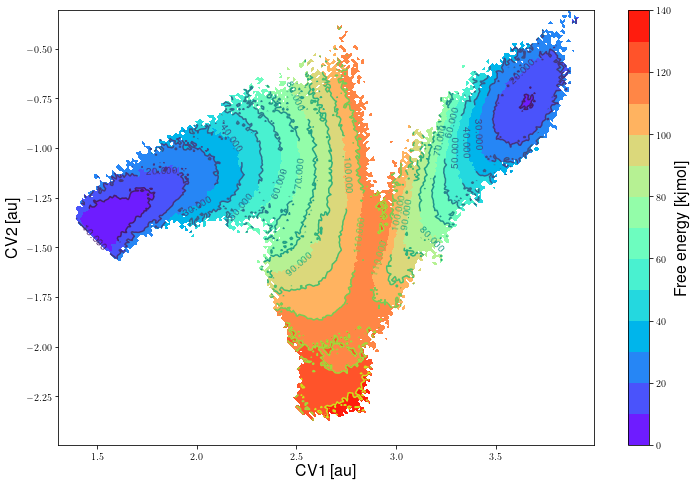

In [3]:
fn_fes_ext = '/home/louis/hpc/data/shared/massimo/for_Louis/2D_umbrella/fes_wham.dat'
temp = 573*kelvin
fes_ext = FreeEnergySurface2D.from_txt(fn_fes_ext, temp, delimiter='\t', verbose=True)
fes_ext.plot('fes_ext.png', ncolors=14, lims=[0,140])

In [4]:
#read temperature and bias potentials from wham_input.txt file
fn_wham = '/home/louis/hpc/data/shared/massimo/for_Louis/2D_umbrella/wham_input_bis.txt'
temp_none, biasses, trajectories = read_wham_input_2D(fn_wham, path_template_colvar_fns='colvar_%s.dat', bias_potential='Parabola2D', verbose=True)

Processing bias U1
  added Parabola2D (U1): K1=500 kjmol  q01=3.700e+00 au  K2=0 kjmol  q02=0.000e+00 au
  trajectory read from /home/louis/hpc/data/shared/massimo/for_Louis/2D_umbrella/colvar_U1.dat

Processing bias U2
  added Parabola2D (U2): K1=1000 kjmol  q01=3.500e+00 au  K2=0 kjmol  q02=0.000e+00 au
  trajectory read from /home/louis/hpc/data/shared/massimo/for_Louis/2D_umbrella/colvar_U2.dat

Processing bias U3
  added Parabola2D (U3): K1=1000 kjmol  q01=3.300e+00 au  K2=0 kjmol  q02=0.000e+00 au
  trajectory read from /home/louis/hpc/data/shared/massimo/for_Louis/2D_umbrella/colvar_U3.dat

Processing bias U4
  added Parabola2D (U4): K1=1000 kjmol  q01=3.100e+00 au  K2=0 kjmol  q02=0.000e+00 au
  trajectory read from /home/louis/hpc/data/shared/massimo/for_Louis/2D_umbrella/colvar_U4.dat

Processing bias U5
  added Parabola2D (U5): K1=1000 kjmol  q01=2.900e+00 au  K2=0 kjmol  q02=0.000e+00 au
  trajectory read from /home/louis/hpc/data/shared/massimo/for_Louis/2D_umbrella/colvar

First do WHAM without error estimation and time Python vs Cython version as well the conservative bias algorithm (given by setting bias_thress to a small non-zero positive number, e.g. 1e-3) vs the regular algorithm

In [5]:
bins = [np.arange(1.305, 3.995+0.05, 0.02), np.arange(-2.495, -0.305+0.05, 0.02)]

We see a speed up of a factor 160 for the version using Cython (and algorithmic upgrades)

In [6]:
hist_f_c = Histogram2D.from_wham_c(bins, trajectories, biasses, temp, error_estimate='mle_f', Nscf=1000, convergence=1e-5, verbosity='medium')

Initialization ...
Constructing individual histograms for each biased simulation ...
Computing bias on grid ...
Solving WHAM equations (SCF loop) ...
  SCF did not converge!
Estimating error ...
  initializing ...
  computing extended Fisher matrix ...
  defining and applying zero-mask ...
  computing inverse of masked flattened Fisher matrix ...
  constructing error bars ...

---------------------------------------------------------------------
TIMING SUMMARY
  initializing: 00h 00m 00.000s
  histograms  : 00h 00m 00.036s
  bias poten. : 00h 00m 03.647s
  solve scf   : 00h 00m 00.769s
  error est.  : 00h 00m 24.389s
  TOTAL       : 00h 00m 28.843s
---------------------------------------------------------------------


In [7]:
hist_f = Histogram2D.from_wham(bins, trajectories, biasses, temp, error_estimate='mle_f', Nscf=1000, convergence=1e-5, verbosity='medium')

Initialization ...
Constructing individual histograms for each biased simulation ...
Computing bias on grid ...
Solving WHAM equations (SCF loop) ...
  SCF did not converge!
Estimating error ...

---------------------------------------------------------------------
TIMING SUMMARY
  initializing: 00h 00m 00.000s
  histograms  : 00h 00m 00.038s
  bias poten. : 00h 00m 25.208s
  solve scf   : 00h 13m 51.251s
  error est.  : 00h 00m 26.295s
  TOTAL       : 00h 14m 42.793s
---------------------------------------------------------------------


/home/louis/miniconda3/lib/python3.8/site-packages/thermolib/thermodynamics/fep.py:1399: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = pp.colorbar(contourf, extend='both')


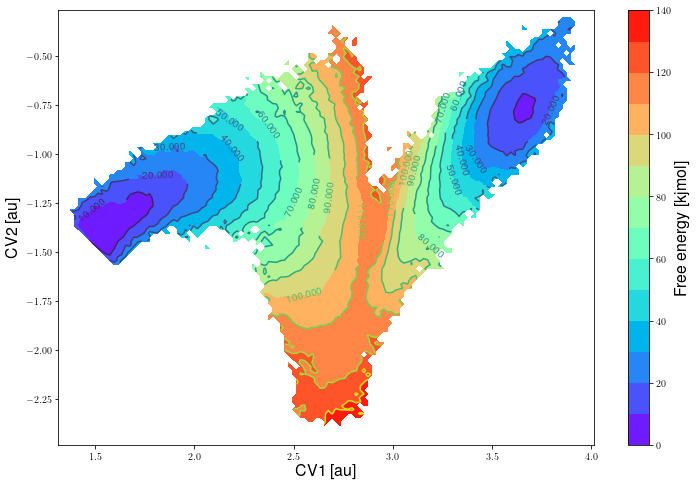

In [8]:
fes = FreeEnergySurface2D.from_histogram(hist_f, temp)
fes.set_ref(ref='min')
fes.plot('fes_c.png', ncolors=14, lims=[0,140])

Plot the FES using the regular bias algorithm (i.e. non-conservative) and using Cython

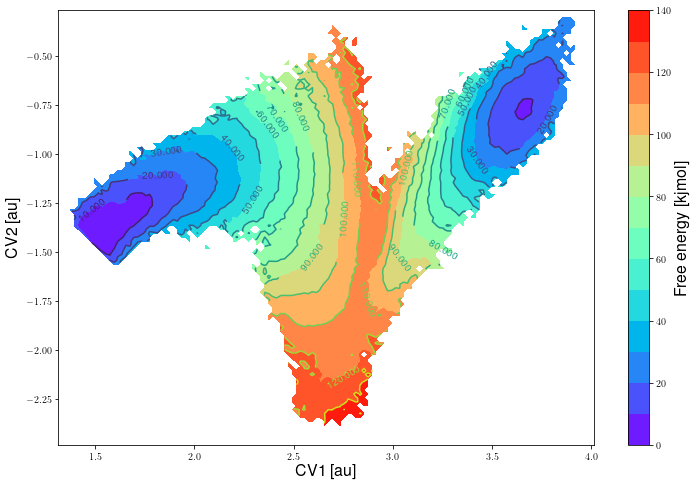

In [9]:
fes_c = FreeEnergySurface2D.from_histogram(hist_f_c, temp)
fes_c.set_ref(ref='min')
fes_c.plot('fes_c.png', ncolors=14, lims=[0,140])

Plot the difference (in FES) between using Cython and pure Python

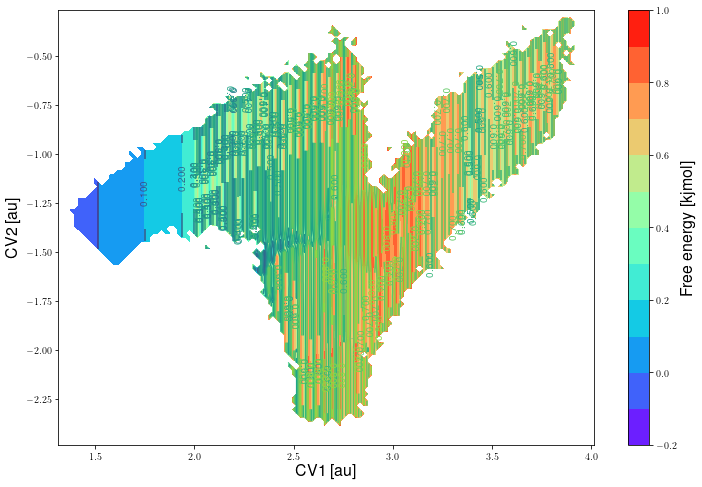

In [27]:
fes_diff = FreeEnergySurface2D(fes.cv1s.copy(), fes.cv2s.copy(), fes_c.fs-fes.fs, fes.T)
fes_diff.plot('fes_diff.png', ncolors=12, lims=[-0.2,1.0])

Plot the mle_f estimated error on the Python and Cython profiles

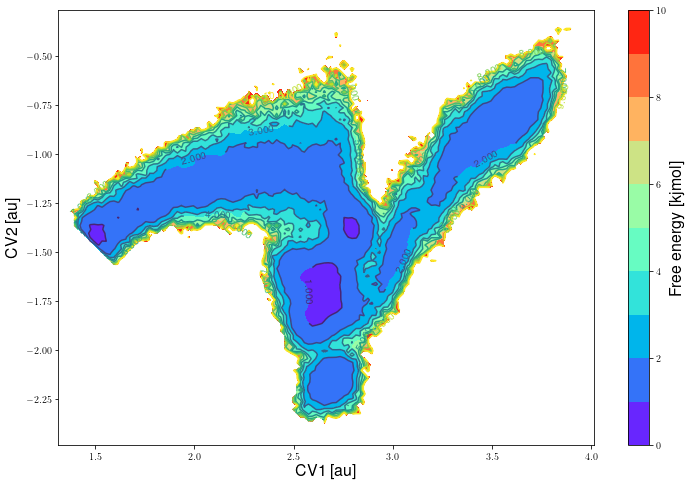

In [18]:
fes_err = FreeEnergySurface2D(fes.cv1s.copy(), fes.cv2s.copy(), fes.fupper-fes.flower, fes.T)
fes_err.plot('fes_err.png', ncolors=10, lims=[0,10])

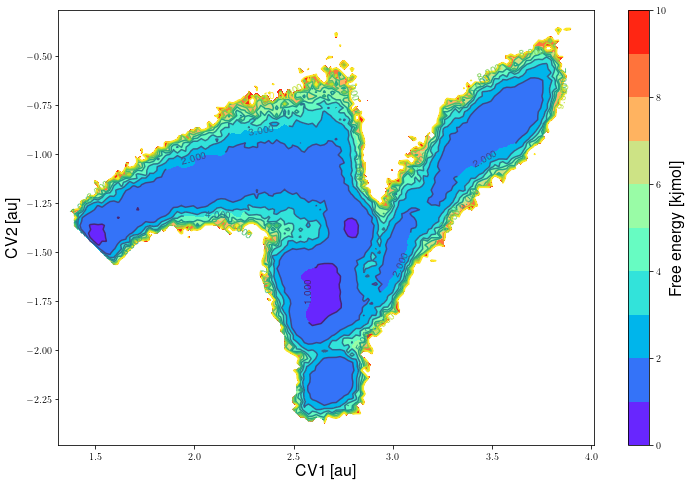

In [19]:
fes_err_c = FreeEnergySurface2D(fes_c.cv1s.copy(), fes_c.cv2s.copy(), fes_c.fupper-fes_c.flower, fes_c.T)
fes_err_c.plot('fes_err_c.png', ncolors=10, lims=[0,10])

Now we project the profile (and its error) onto CV1 and plot the projected profile

<Figure size 432x288 with 0 Axes>

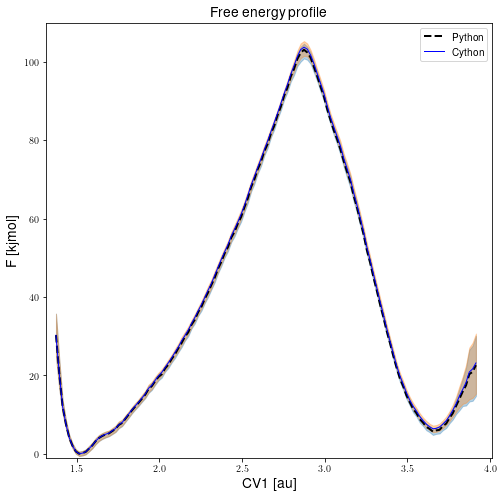

In [22]:
fep = fes.project_cv1()
fep.set_ref(ref='min')
fep_c = fes_c.project_cv1()
fep_c.set_ref(ref='min')
plot_feps('feps_err.png', [fep, fep_c], labels=["Python", "Cython"], linestyles=['--','-'], colors=['k','b'], linewidths=[2,1])

# Example Elias 2

In [ ]:
fn_fes_ext = '/home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/CDealkylation/freefile_3108'
temp = 523*kelvin
fes_ext = FreeEnergySurface2D.from_txt(fn_fes_ext, temp, delimiter='\t', verbose=True)
fes_ext.plot('fes_elias2_ext.png', ncolors=12, lims=[0,120])

In [ ]:
#read temperature and bias potentials from wham_input.txt file
fn_wham = '/home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/CDealkylation/metadatafile_2D'
temp_none, biasses, trajectories = read_wham_input_2D(fn_wham, path_template_colvar_fns='%s', verbose=True)

In [ ]:
bins = [np.arange(0.0, 0.9+0.9/240, 0.9/240),np.arange(1.4,2.8+1.4/240,1.4/240)]
hist = Histogram2D.from_wham(bins, trajectories, biasses, temp, error_estimate=None, verbose=True, convergence=1e-4, plot_biases=True)

In [ ]:
fes = FreeEnergySurface2D.from_histogram(hist, temp)
fes.set_ref(ref='min')
fes.plot('fes_elias2.png', ncolors=12, lims=[0,120])

In [ ]:
pinit = hist.ps.copy()
hist2 = Histogram2D.from_wham(bins, trajectories, biasses, temp, pinit=pinit, error_estimate=None, verbose=True, convergence=1e-4)

In [ ]:
fes2 = FreeEnergySurface2D.from_histogram(hist2, temp)
fes2.set_ref(ref='min')
fes2.plot('fes_elias2_2.png', ncolors=18, lims=[0,120])

In [ ]:
fes_ext_cleaned = fes_ext.copy()
fes_ext_cleaned.detect_clusters(fn_plot='clusters.png')

In [ ]:
fes_cleaned = fes.copy()
fes_cleaned.detect_clusters(fn_plot='clusters.png')

In [ ]:
fep_ext = fes_ext_cleaned.project_cv1()
fep_ext.process_states(ts_range=[0.3,0.5])
#fep_ext.recollect(np.arange(-1.50,0.50+1/480,1/480))
fep_ext.set_ref(ref='p')
fep = fes_cleaned.project_cv1()
fep.process_states(ts_range=[0.3,0.5])
#fep.recollect(np.arange(-1.50,0.50+1/480,1/480))
fep.set_ref(ref='p')
plot_feps('projected_feps.png', [fep_ext,fep], temp=523*kelvin, 
          labels=['External', 'ThermoLIB'], colors=['k','b'],linestyles=['--', '-'], flims=[-30,120])

In [ ]:
fep_ext2 = fes_ext_cleaned.project_cv2()
fep_ext2.process_states(ts_range=[1.8,2.2])
fep_ext2.set_ref(ref='r')
fep2 = fes_cleaned.project_cv2()
fep2.process_states(ts_range=[1.8,2.2])
fep2.set_ref(ref='r')
plot_feps('projected_feps.png', [fep_ext2,fep2], temp=523*kelvin, 
          labels=['External', 'ThermoLIB'], colors=['k','b'],linestyles=['--', '-'], flims=[-30,120])